In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [9]:
basedir = Path().resolve().parent
logdir = basedir / 'logs'
datadir = basedir / 'data'

In [3]:
train = pd.read_csv(datadir / 'train_RC_kfold5_seed42.csv', index_col=0)
train.head()

/home/yamaguchi-milkcocholate/.local/share/virtualenvs/GoogleBrain-VentilatorPressurePrediction-QG-B7qSz/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,breath_id,R,C,time_step,u_in,u_out,pressure,RC,kfold
0,1,1,20,50,0.000000,0.083334,0,5.837492,20_50,1
1,2,1,20,50,0.033652,18.383041,0,5.907794,20_50,1
2,3,1,20,50,0.067514,22.509278,0,7.876254,20_50,1
3,4,1,20,50,0.101542,22.808822,0,11.742872,20_50,1
4,5,1,20,50,0.135756,25.355850,0,12.234987,20_50,1


In [5]:
bids = train.breath_id.unique()
train_pressure = pd.DataFrame({'breath_id': bids})
train_pressure[np.arange(80)] = train.pressure.values.reshape(-1, 80)
train_out = pd.DataFrame({'breath_id': bids})
train_out[np.arange(80)] = train.u_out.values.reshape(-1, 80)

In [21]:
def create_mae(save_folder):
    valid_preds = pd.read_csv(logdir / save_folder / 'valid_preds.csv', index_col=0)
    valid_preds['breath_id'] = bids
    
    records = {'breath_id': bids, 'mae': []}
    for i, (y_true, y_pred, u_out) in enumerate(zip(
        train_pressure.values[:, 1:],
        valid_preds.values[:, 1:],
        train_out.values[:, 1:])):
        
        mae = ((1 - u_out) * np.abs(y_true - y_pred)).sum()
        mae /= np.sum(1 - u_out)
        
        records['mae'].append(mae)
    mae_df = pd.DataFrame(records)
    return mae_df

In [22]:
mae_df = create_mae('lstm-less-addfeatures')


In [28]:
['a', 'b', 'c'].index('b')

1

<AxesSubplot:>

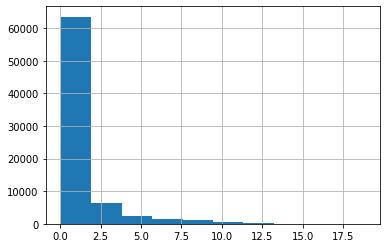

In [26]:
mae_df.mae.hist()

In [25]:
mae_df.mae.mean()

1.4225576505853597